In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [23]:
#df = pd.read_csv('/root/bryton/github/cv_research/bryton/ml_sealice/2016.csv')
df = pd.read_csv('/root/bryton/github/cv_research/bryton/ml_sealice/combined_2016_2018.csv')


In [24]:
df
delicings = np.where(df['mechanicalRemoval'].isnull() == False)[0]

num_delicings = len(delicings)
num_site_weeks = len(df)

num_delicings / num_site_weeks

# Average time between delicings
# Number of delicings
# Pull specifically for Erko

0.05609444798978941

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


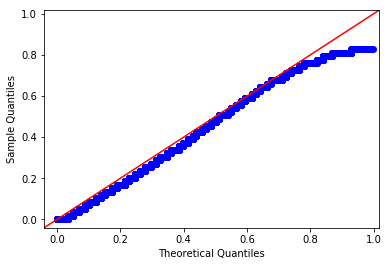

In [25]:
num = df.loc[df['avgAdultFemaleLice'] < 0.5, 'avgAdultFemaleLice']
#num = df.loc[df['avgMobileLice'] < 1.5, 'avgMobileLice']
#num = df.loc[df['avgStationaryLice'] < 0.5, 'avgStationaryLice']

dist = dist=stats.distributions.beta
res = num
#res = np.log(1 + num)

fig = sm.qqplot(res, dist=dist, fit=True, line='45')

plt.show()

In [26]:
dist= dist=stats.distributions.expon

id                                                45024
localityNo                                        11756
year                                               2016
week                                                  1
hasReportedLice                                    True
hasMechanicalRemoval                              False
hasBathTreatment                                  False
hasInFeedTreatment                                False
hasCleanerFishDeployed                            False
isFallow                                          False
avgAdultFemaleLice                                 0.47
avgMobileLice                                       1.2
avgStationaryLice                                  0.77
seaTemperature                                      7.4
bathTreatments                                       []
inFeedTreatments                                     []
cleanerFish                                         NaN
mechanicalRemoval                               

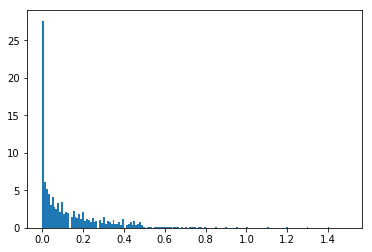

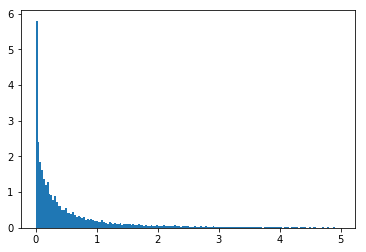

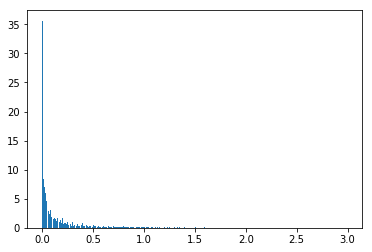

0.15155009572431397
0.07
0.6692331844288449
0.25
0.22883969368219528
0.04
0.00: 0.00, 0.00, 0.00
1.00: 0.00, 0.00, 0.00
2.00: 0.00, 0.00, 0.00
3.00: 0.00, 0.00, 0.00
4.00: 0.00, 0.00, 0.00
5.00: 0.00, 0.00, 0.00
6.00: 0.00, 0.00, 0.00
7.00: 0.00, 0.00, 0.00
8.00: 0.00, 0.00, 0.00
9.00: 0.00, 0.00, 0.00
10.00: 0.00, 0.00, 0.00
11.00: 0.00, 0.00, 0.00
12.00: 0.00, 0.01, 0.00
13.00: 0.00, 0.01, 0.00
14.00: 0.00, 0.01, 0.00
15.00: 0.00, 0.02, 0.00
16.00: 0.00, 0.02, 0.00
17.00: 0.00, 0.02, 0.00
18.00: 0.00, 0.03, 0.00
19.00: 0.00, 0.03, 0.00
20.00: 0.00, 0.04, 0.00
21.00: 0.00, 0.04, 0.00
22.00: 0.00, 0.05, 0.00
23.00: 0.00, 0.05, 0.00
24.00: 0.00, 0.05, 0.00
25.00: 0.00, 0.06, 0.00
26.00: 0.01, 0.07, 0.00
27.00: 0.01, 0.07, 0.00
28.00: 0.01, 0.08, 0.00
29.00: 0.01, 0.08, 0.00
30.00: 0.01, 0.09, 0.01
31.00: 0.01, 0.10, 0.01
32.00: 0.02, 0.10, 0.01
33.00: 0.02, 0.10, 0.01
34.00: 0.02, 0.11, 0.01
35.00: 0.02, 0.12, 0.01
36.00: 0.03, 0.13, 0.01
37.00: 0.03, 0.13, 0.02
38.00: 0.03, 0.14, 0.02


In [27]:
print(df.iloc[0])

plt.hist(df.loc[df['avgAdultFemaleLice'] < 1.5, 'avgAdultFemaleLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgMobileLice'] < 5, 'avgMobileLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgStationaryLice'] < 3, 'avgStationaryLice'], bins='auto', density=True)
plt.show()

print(np.mean(df['avgAdultFemaleLice']))
print(np.median(df['avgAdultFemaleLice']))

print(np.mean(df['avgMobileLice']))
print(np.median(df['avgMobileLice']))

print(np.mean(df['avgStationaryLice']))
print(np.median(df['avgStationaryLice']))

for i in range(0, 100, 1):
    p1 = np.percentile(df['avgAdultFemaleLice'], i) # return 50th percentile, e.g median.
    p2 = np.percentile(df['avgMobileLice'], i) # return 50th percentile, e.g median.
    p3 = np.percentile(df['avgStationaryLice'], i) # return 50th percentile, e.g median.
    print('%0.2f: %0.2f, %0.2f, %0.2f' % (i, p1, p2, p3))

In [28]:
my_df = df.loc[:,'avgAdultFemaleLice':'seaTemperature']

new_df = my_df.copy()
norm_df = my_df.copy()

for x in my_df.columns:
    my_mean = my_df[x].median()
    my_std = my_df[x].std()
    my_iqr = stats.iqr(my_df[x])
    
    my_row = my_df[x].copy()
    new_df[x] = my_row / my_iqr
    norm_df[x] = (my_row - my_mean) / my_std

0.9757498404594767


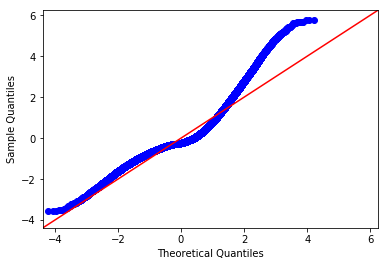

                            OLS Regression Results                            
Dep. Variable:      avgStationaryLice   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     4440.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):               0.00
Time:                        12:26:48   Log-Likelihood:                -49035.
No. Observations:               76450   AIC:                         9.809e+04
Df Residuals:                   76440   BIC:                         9.818e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2304      0.058      3.999      0.0

In [29]:
#good_indices_1 = (my_df == 0).any(axis=1) == False
good_indices_2 = my_df['avgAdultFemaleLice'] < 1.5
good_indices_3 = my_df['avgMobileLice'] < 5
good_indices_4 = my_df['avgStationaryLice'] < 3

good_indices = good_indices_2 & good_indices_3 & good_indices_4

print(np.sum(good_indices) / len(good_indices))

my_df_X = new_df.filter(['avgAdultFemaleLice', 'avgMobileLice', 'seaTemperature'], axis=1)
my_df_Y = new_df['avgStationaryLice'][good_indices]

my_df_X = my_df_X.loc[good_indices, :]

my_df_X = np.log(1 + my_df_X)
my_df_Y = my_df_Y
#my_df_Y = np.log(1 + my_df_Y)

my_df_X = np.hstack((my_df_X, my_df_X ** 2, np.log(1 + my_df_X)))

myX = sm.add_constant(my_df_X)
myY = np.log(1 + my_df_Y)

model = sm.OLS(myY, myX).fit()

res = model.resid
fig = sm.qqplot(res, dist=stats.distributions.norm, fit=True, line='45')

plt.show()

print(model.summary())

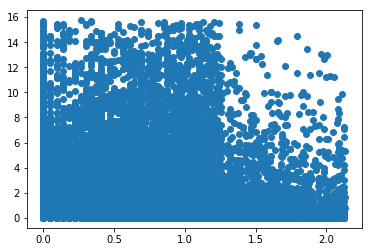

In [30]:
plt.scatter(my_df_X[:,0], my_df_Y)
plt.show()

0.206281275370924


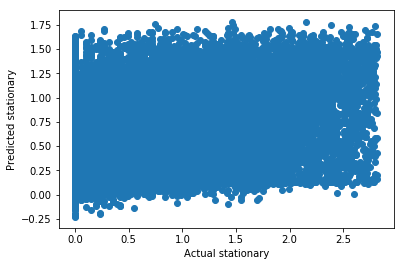

In [31]:
predY = model.predict(myX)
error = predY - myY

avg_error = np.median(np.abs(error))

print(avg_error)

plt.scatter(myY, predY)
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

None


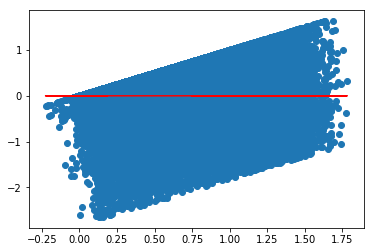

In [32]:
res_X = predY
res_Y = predY - myY

res_myX = sm.add_constant(res_X)
res_myY = res_Y

res_model = sm.OLS(res_myY, res_myX).fit_regularized(L1_wt=0)
res_predY = res_model.predict(res_myX)

print(res_model.summary())

plt.scatter(res_X, res_Y)
plt.plot(res_X, res_predY, color='red')
plt.show()

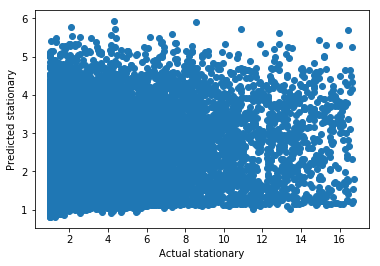

0.2807552127259906


In [33]:
plt.scatter(np.exp(myY), np.exp(predY))
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

error = np.exp(predY) - np.exp(myY)

avg_error = np.median(np.abs(error))

print(avg_error)

In [34]:
# Trying a different model that is time-series based

       avgAdultFemaleLice  avgMobileLice  avgStationaryLice  seaTemperature
0                    0.47           1.20               0.77             7.4
489                  0.45           1.30               0.40             7.2
984                  0.48           2.15               0.23             6.4
1484                 0.10           0.18               0.15             6.1
1984                 0.17           0.13               0.13             6.0
2474                 0.10           0.20               0.25             6.2
2942                 0.13           0.27               0.23             6.3
3413                 0.17           0.33               0.50             5.8
3881                 0.20           0.55               0.45             5.8
4333                 0.25           0.60               0.20             5.7
4789                 0.27           0.73               0.37             6.0
5245                 0.25           1.05               0.05             6.0
5688        

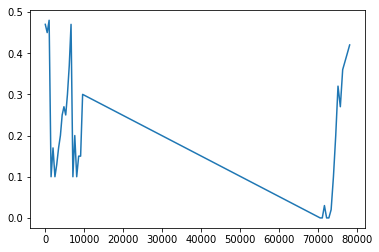

In [35]:
subset = my_df.loc[df['localityNo'] == 11756]

print(subset)

plt.plot(subset['avgAdultFemaleLice'])
plt.show()

(35, 4)
(35, 4)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     8.745
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           0.000476
Time:                        12:26:51   Log-Likelihood:                -1.8085
No. Observations:                  20   AIC:                             13.62
Df Residuals:                      15   BIC:                             18.60
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9369      0.696    

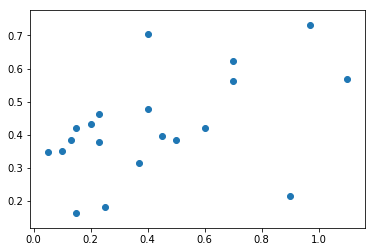

In [36]:
print(subset.shape)

subset_v = subset.values
print(subset_v.shape)

diff = subset_v[1:21] - subset_v[0:20]

diff_myX = np.hstack((subset_v[1:21,0:1], subset_v[0:20,:]))
diff_myY = subset_v[1:21, 2]

diff_model = sm.OLS(diff_myY, diff_myX).fit()
diff_predY = diff_model.predict(diff_myX)

print(diff_model.summary())

plt.scatter(diff_myY, diff_predY)
plt.show()

In [74]:
localityNumbers = np.unique(df['localityNo'])

all_diff_myX = None
all_diff_myY = None

for localityNo in localityNumbers:
    subset = my_df.loc[df['localityNo'] == localityNo]
    subset_v = subset.values
    num_obs = subset_v.shape[0]

    diff = subset_v[1:num_obs] - subset_v[0:(num_obs - 1)]
    
    diff_myX = np.hstack((subset_v[1:num_obs,0:2], subset_v[0:(num_obs - 1),0:3], (subset_v[1:num_obs,0:2] - subset_v[0:(num_obs - 1),0:2]) / subset_v[0:(num_obs - 1),0:2]))
    #diff_myY = subset_v[1:num_obs, 2]
    diff_myY = (subset_v[1:num_obs, 2] - subset_v[0:(num_obs - 1),2]) #/ subset_v[0:(num_obs - 1),2]
    
    if all_diff_myX is None:
        all_diff_myX = diff_myX
        all_diff_myY = diff_myY
    else:
        all_diff_myX = np.vstack((all_diff_myX, diff_myX))
        all_diff_myY = np.concatenate((all_diff_myY, diff_myY))
        
print('done')
print(all_diff_myX.shape)
print(all_diff_myY.shape)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


done
(77425, 7)
(77425,)


In [75]:
all_diff_myX

array([[ 0.3       ,  1.35      ,  0.23      , ...,  0.07      ,
         0.30434783,  0.5       ],
       [ 0.03      ,  0.37      ,  0.3       , ...,  0.05      ,
        -0.9       , -0.72592593],
       [ 0.2       ,  0.7       ,  0.03      , ...,  0.        ,
         5.66666667,  0.89189189],
       ...,
       [ 0.2       ,  0.12      ,  0.38      , ...,  0.08      ,
        -0.47368421, -0.76      ],
       [ 0.18      ,  0.18      ,  0.2       , ...,  0.01      ,
        -0.1       ,  0.5       ],
       [ 0.28      ,  1.6       ,  0.18      , ...,  0.1       ,
         0.55555556,  7.88888889]])

0.21460768485631257
0
0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     81.74
Date:                Mon, 12 Nov 2018   Prob (F-statistic):          2.73e-117
Time:                        12:51:31   Log-Likelihood:                 13775.
No. Observations:               16616   AIC:                        -2.753e+04
Df Residuals:                   16608   BIC:                        -2.747e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0

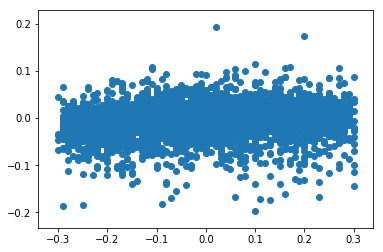

In [92]:
good_indices_2 = all_diff_myX[:,0] < 1.5
good_indices_3 = all_diff_myX[:,1] < 5
good_indices_4 = all_diff_myX[:,2] < 1.5
good_indices_5 = all_diff_myX[:,3] < 5
good_indices_6 = all_diff_myX[:,4] < 3
good_indices_7 = all_diff_myY < 3

good_indices_8 = all_diff_myX[:,0] > 0.00001
good_indices_9 = all_diff_myX[:,1] > 0.00001
good_indices_10 = all_diff_myX[:,2] > 0.00001
good_indices_11 = all_diff_myX[:,3] > 0.00001
good_indices_12 = all_diff_myX[:,4] > 0.00001
good_indices_13 = all_diff_myX[:,5] > 0.00001

good_indices_14 = all_diff_myY > -0.3
good_indices_15 = all_diff_myY < 0.3

good_indices = good_indices_2 & good_indices_3 & good_indices_4 & good_indices_5 & good_indices_6 & good_indices_7 
good_indices = good_indices & good_indices_8 & good_indices_9 & good_indices_10 & good_indices_11 & good_indices_12 & good_indices_13 
good_indices = good_indices & good_indices_14 & good_indices_15

print(np.sum(good_indices) / len(good_indices))

all_filtered_myX = all_diff_myX[good_indices, :]
all_filtered_myY = all_diff_myY[good_indices]

print(np.sum(np.isinf(all_filtered_myX)))
print(np.sum(np.isinf(all_filtered_myY)))

all_myX = sm.add_constant(np.hstack((all_filtered_myX, ))) # np.log(1 + all_filtered_myX)
all_myY = all_filtered_myY #np.log(1+all_filtered_myY)

all_diff_model = sm.OLS(all_myY, all_myX).fit()
all_predY = all_diff_model.predict(all_myX)

print(all_diff_model.summary())

plt.scatter(all_myY, all_predY)
plt.show()

0: 0.000, -0.20, -0.30
5: 0.005, -0.03, -0.19
10: 0.009, -0.02, -0.13
15: 0.014, -0.01, -0.10
20: 0.018, -0.01, -0.07
25: 0.022, -0.00, -0.05
30: 0.027, -0.00, -0.04
35: 0.033, 0.00, -0.03
40: 0.039, 0.00, -0.02
45: 0.046, 0.00, -0.01
50: 0.053, 0.01, 0.00
55: 0.062, 0.01, 0.00
60: 0.072, 0.01, 0.01
65: 0.084, 0.01, 0.02
70: 0.098, 0.01, 0.04
75: 0.114, 0.01, 0.06
80: 0.135, 0.01, 0.08
85: 0.159, 0.01, 0.11
90: 0.191, 0.02, 0.15
95: 0.232, 0.03, 0.20


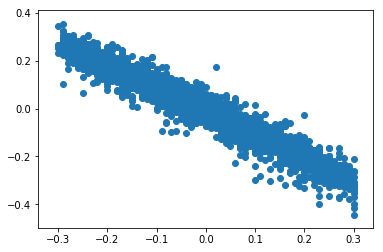

In [95]:
final_predY = all_predY#np.exp(all_predY) - 1
final_myY = all_myY#np.exp(all_myY) - 1

error = np.abs(final_predY - final_myY)

for i in range(0, 100, 5):
    p1 = np.percentile(error, i) # return 50th percentile, e.g median.
    p2 = np.percentile(final_predY, i) # return 50th percentile, e.g median.
    p3 = np.percentile(final_myY, i) # return 50th percentile, e.g median.
    print('%i: %0.3f, %0.2f, %0.2f' % (i, p1, p2, p3))
    
plt.scatter(all_myY, all_predY - all_myY)
plt.show()